33.76623376623377
Positive tweets percentage: 33.76623376623377 %
3.896103896103896
Negative tweets percentage: 3.896103896103896 %
62.33766233766234
Neutral tweets percentage: 62.33766233766234 %  


Positive tweets:
RT @eoyentertainmen: Here’s #Spyder 2nd week show times. 
running successfully in france 🔥😎 https://t.co/A5SJ9lGNxf
@ARMurugadoss hey are you a really director for thuppaki, Kathi.. Spyder is clear misleading through Glimpse, teaser, trailer shots...🙏🙏🙏🙏
RT @chenna_prince: First 1M+ Movie #Dookudu
First 1M+ Movie With Disaster Talk #1Nenokkadine
First 1.5M+ Movie With Disaster Talk #Spyder
@…
RT @chenna_prince: 1st Week Top 5 Grossers
#Bahubali2
#Bahubali
#KhaidiNo150 
#Spyder
#Srimanthudu 
👍👍👍👍
RT @Sumandhfm: *Flop-u movie ki Loss-u ravadam nothing special
*Hit-u movie ki loss-u ravadam something special
#spyder #Jailavakusa https:…
RT @nagsforfun1: Andhra Share of Disaster Spyder in first week is 18C, compared to 16.75C full run of Super hit NPT which released not long…

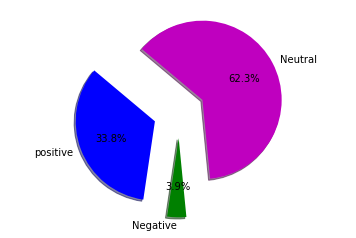

In [32]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
import matplotlib.pyplot as plt 
class TwitterClient(object):
    '''
    Generic Twitter Class for sentiment analysis.
    '''
    def __init__(self):
        '''
        Class constructor or initialization method.
        '''
        # keys and tokens from the Twitter Dev Console
        consumer_key = 'dq5JOgv9zI1d6FPxXuW9n35Ht'
        consumer_secret = '1rjHWoVCJrA79HDSld7rPoYryOTjQWUVRkUYxZn5NdeSYcohc6'
        access_token = '908292988798771200-n0y6mQ11f5Ebyx2SGNRFiLpBhYKRIsW'
        access_token_secret = 'BCgBmGn7uBstT8altJjtzbftHtBMLNv6JcDGh9jOi7etr'
 
        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
 
    def clean_tweet(self, tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
 
    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
 
    def get_tweets(self, query, count = 10):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []
 
        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search(q = query, count = count)
 
            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
 
                # saving text of tweet
                parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
 
                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
 
            # return parsed tweets
            return tweets
 
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))
def main():
    # creating object of TwitterClient Class
    api = TwitterClient()
    # calling function to get tweets
    tweets = api.get_tweets(query = 'spyder', count = 200)
 
    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    pt=100*len(ptweets)/len(tweets)
    print(pt)
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    neutweets = [tweet for tweet in tweets if (tweet['sentiment']!='positive' and tweet['sentiment']!='negative')]
    nt=100*len(ntweets)/len(tweets)
    print(nt)
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
    # percentage of neutral tweets
    net=100*len(neutweets)/len(tweets)
    print(net);
    print("Neutral tweets percentage: {} %  ".format(100*len(neutweets)/len(tweets)))
 
    # printing first 5 positive tweets
    print("\n\nPositive tweets:")
    for tweet in ptweets[:10]:
        print(tweet['text'])
 
    # printing first 5 negative tweets
    print("\n\nNegative tweets:")
    for tweet in ntweets[:10]:
        print(tweet['text'])
    labels = "positive","Negative","Neutral"
    sizes = [pt,nt,net]
    colors = ["b","g","m"]
    explode = (0.33, 0.33, 0.33)  # explode 1st slice
    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()
        
if __name__ == "__main__":
    # calling main function
    main()


NameError: name 'pt' is not defined